# Frequency Response

In control theory, understanding a system's behavior across a range of frequencies is essential for designing stable and effective control systems. This is achieved through the concepts of frequency response and the Bode diagram. <br> The frequency response of a system describes how its output amplitude and phase vary with different input frequencies. It provides valuable insights into how a system responds to sinusoidal inputs at various frequencies.

# Bode Diagram

The Bode diagram is a graphical representation of a system's frequency response. It typically use logarithmic scales for frequency, making it easier to analyze a wide frequency range. Bode diagrams are particularly useful in control system design for assessing stability and performance characteristics.

![Logarithmic scale](images/log-scale.png)


The Bode diagram consists of two plots:

- **Magnitude Plot:** The magnitude plot shows the system's gain (amplitude ratio) as a function of frequency. It helps identify the system's behavior in terms of amplification or attenuation at different frequencies.

- **Phase Plot:** The phase plot shows the system's phase shift as a function of frequency. It provides information about the timing relationships between input and output signals.

![Bode diagam](images/bode-plot.png)


## Bode Diagram Plot G(s) = K

This interactive plot displays the Bode diagram for a system with a variable gain (K). You can adjust the gain using the slider and observe how it influences the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s).

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the slider for the gain (K) to observe changes in the Bode diagram.

### Slider:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain values to understand how the Bode diagram responds to changes in the system's gain.


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K):
    sys = signal.TransferFunction([K], [1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-60, 60)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2),
               ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive slider for gain K
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), Output()), _dom_clas…

## Bode Diagram Plot G(s) = K / s

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K). The enhancements include visual markers for the gain value (K) and the region affected by the gain adjustment. You can adjust the gain using the slider and observe how it influences the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, a red dotted line marks the value of K in decibels, and green dotted lines highlight the region affected by the gain adjustment.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the slider for the gain (K) to observe changes in the enhanced Bode diagram.

### Slider:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain values to understand how the enhanced Bode diagram responds to changes in the system's gain.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K):
    sys = signal.TransferFunction([K], [1, 0])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw green dotted lines
    mag_value = 20 * np.log10(K)
    plt.plot([1, 10], [mag_value - 20, mag_value - 20], 'g--', label='20dB/dec decay')
    plt.plot([10, 10], [mag_value - 20, mag_value], 'g--')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive slider for gain K
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), Output()), _dom_clas…

## Bode Diagram Plot G(s) = K • s

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K). The enhancements include visual markers for the gain value (K) and the region affected by the gain adjustment. You can adjust the gain using the slider and observe how it influences the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, a red dotted line marks the value of K in decibels, and green dotted lines highlight the region affected by the gain adjustment.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the slider for the gain (K) to observe changes in the enhanced Bode diagram.

### Slider:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain values to understand how the enhanced Bode diagram responds to changes in the system's gain.


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K):
    sys = signal.TransferFunction([K, 0], [1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw green dotted lines
    mag_value = 20 * np.log10(K)
    plt.plot([1, 10], [mag_value + 20, mag_value + 20], 'g--', label='20dB/dec decay')
    plt.plot([10, 10], [mag_value + 20, mag_value], 'g--')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive slider for gain K
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), Output()), _dom_clas…

## Bode Diagram Plot G(s) = K / s^2

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K). The enhancements include visual markers for the gain value (K), a red dotted line representing K (dB), and green dotted lines indicating the region affected by the gain adjustment with a 40dB/dec decay. You can adjust the gain using the slider and observe how it influences the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, a red dotted line marks the value of K in decibels, and green dotted lines highlight the region affected by the gain adjustment with a 40dB/dec decay.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the slider for the gain (K) to observe changes in the enhanced Bode diagram.

### Slider:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain values to understand how the enhanced Bode diagram responds to changes in the system's gain.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K):
    sys = signal.TransferFunction([K], [1, 0, 0])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw green dotted lines
    mag_value = 20 * np.log10(K)
    plt.plot([1, 10], [mag_value - 40, mag_value - 40], 'g--', label='40dB/dec decay')
    plt.plot([10, 10], [mag_value - 40, mag_value], 'g--')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-60, 60)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive slider for gain K
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), Output()), _dom_clas…

## Bode Diagram Plot G(s) = K • s^2

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K). The enhancements include visual markers for the gain value (K), a red dotted line representing K (dB), and green dotted lines indicating the region affected by the gain adjustment with a 40dB/dec decay. You can adjust the gain using the slider and observe how it influences the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, a red dotted line marks the value of K in decibels, and green dotted lines highlight the region affected by the gain adjustment with a 40dB/dec decay.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the slider for the gain (K) to observe changes in the enhanced Bode diagram.

### Slider:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain values to understand how the enhanced Bode diagram responds to changes in the system's gain.


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K):
    sys = signal.TransferFunction([K, 0, 0], [1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw green dotted lines
    mag_value = 20 * np.log10(K)
    plt.plot([1, 10], [mag_value + 40, mag_value + 40], 'g--', label='40dB/dec decay')
    plt.plot([10, 10], [mag_value + 40, mag_value], 'g--')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-60, 60)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive slider for gain K
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), Output()), _dom_clas…

## Bode Diagram Plot G(s) = K / s^n

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K) and an adjustable exponent (n) for additional poles at the origin. The enhancements include visual markers for the gain value (K), a red dotted line representing K (dB), and green dotted lines indicating the region affected by the gain adjustment with a dB/dec decay based on the exponent (n). You can adjust both the gain and the exponent using the sliders and observe how they influence the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, a red dotted line marks the value of K in decibels, and green dotted lines highlight the region affected by the gain adjustment with a dB/dec decay based on the exponent (n).

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the sliders for the gain (K) and the exponent (n) to observe changes in the enhanced Bode diagram.

### Sliders:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

- **Poles in Zero (n):** Adjust the number of additional poles at the origin.
  - *Range:* 0 to 3 with a step size of 1.

Feel free to experiment with different gain values and pole configurations to understand how they influence the system's frequency response.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider, IntSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K, n):
    sys = signal.TransferFunction([K], [1] + [0]*n)

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw green dotted lines
    mag_value = 20 * np.log10(K)
    plt.plot([1, 10], [mag_value - 20 * n, mag_value - 20 * n], 'g--', label='dB/dec decay')
    plt.plot([10, 10], [mag_value - 20 * n, mag_value], 'g--')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-60, 60)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive sliders for gain K and exponent n
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')
n_slider = IntSlider(value=1, min=0, max=3, step=1, description='Poles in zero (n):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider, n=n_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), IntSlider(value=1, d…

## Bode Diagram Plot G(s) = K • s^n

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K) and an adjustable exponent (n) for additional zeros at the origin. The enhancements include visual markers for the gain value (K), a red dotted line representing K (dB), and green dotted lines indicating the region affected by the gain adjustment with a dB/dec decay based on the exponent (n). You can adjust both the gain and the exponent using the sliders and observe how they influence the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, a red dotted line marks the value of K in decibels, and green dotted lines highlight the region affected by the gain adjustment with a dB/dec decay based on the exponent (n).

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the sliders for the gain (K) and the exponent (n) to observe changes in the enhanced Bode diagram.

### Sliders:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

- **Zeros in Zero (n):** Adjust the number of additional zeros at the origin.
  - *Range:* 0 to 3 with a step size of 1.

Feel free to experiment with different gain values and pole configurations to understand how they influence the system's frequency response.


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider, IntSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K, n):
    sys = signal.TransferFunction([K] + [0]*n, [1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)
    
    # Draw red dotted line
    plt.plot([1, 1], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw green dotted lines
    mag_value = 20 * np.log10(K)
    plt.plot([1, 10], [mag_value + 20 * n, mag_value + 20 * n], 'g--', label=f'{20 * n}dB/dec decay')
    plt.plot([10, 10], [mag_value + 20 * n, mag_value], 'g--')
    
    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-60, 60)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi/180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    
    # Set custom yticks for phase between pi and -pi
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive sliders for gain K and exponent n
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')
n_slider = IntSlider(value=1, min=0, max=3, step=1, description='Exponent (n):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider, n=n_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), IntSlider(value=1, d…

## Bode Diagram Plot G(s) = K / (1 + s • τ)

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K) and an adjustable time constant (τ). The enhancements include visual markers for the gain value (K), the break frequency (1/τ), and green dotted lines indicating the asymptotic decay of the system. You can adjust both the gain and the time constant using the sliders and observe how they influence the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, red and blue dotted lines mark the values of K (dB) and the break frequency (1/τ), respectively. Green dotted lines highlight the region affected by the gain adjustment and the asymptotic decay.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the sliders for the gain (K) and the time constant (τ) to observe changes in the enhanced Bode diagram.

### Sliders:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

- **Time Constant (τ):** Adjust the time constant of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain and time constant values to understand how they influence the system's frequency response.


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K, tau):
    sys = signal.TransferFunction([K], [tau, 1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude, label='Actual Bode Diagram')

    # Draw red dotted line
    plt.plot([1 / tau, 1 / tau], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw blue dotted line
    if(K>=1):
        plt.plot([1 / tau, 1 / tau], [-40, 0], 'b--', label='Break Frequency (1/τ)')
    else:
        plt.plot([1 / tau, 1 / tau], [magnitude[0], magnitude[-1]], 'b--', label='Break Frequency (1/τ)')

    # Draw green dotted lines
    plt.plot([1e-2, 1 / tau], [magnitude[0], magnitude[0]], 'g--', label='Asymptotic Decay')
    plt.plot([1 / tau, 1e2], [magnitude[0], magnitude[-1]], 'g--')

    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi / 180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive sliders for gain K and time constant tau
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')
tau_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Time Constant (τ):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider, tau=tau_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), FloatSlider(value=1.…

## Bode Diagram Plot G(s) = K • (1 + s • τ)

This interactive plot displays the enhanced Bode diagram for a system with a variable gain (K) and an adjustable time constant (τ). The enhancements include visual markers for the gain value (K), the break frequency (1/τ), and green dotted lines indicating the asymptotic decay of the system. You can adjust both the gain and the time constant using the sliders and observe how they influence the magnitude and phase of the system's frequency response.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Additionally, red and blue dotted lines mark the values of K (dB) and the break frequency (1/τ), respectively. Green dotted lines highlight the region affected by the gain adjustment and the asymptotic decay.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). Custom yticks are set to represent phase values between π and -π.

### Instructions:

Adjust the sliders for the gain (K) and the time constant (τ) to observe changes in the enhanced Bode diagram.

### Sliders:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

- **Time Constant (τ):** Adjust the time constant of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different gain and time constant values to understand how they influence the system's frequency response.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K, tau):
    sys = signal.TransferFunction([K * tau, K], [1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-2, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude, label='Actual Bode Diagram')

    # Draw red dotted line
    plt.plot([1 / tau, 1 / tau], [0, 20 * np.log10(K)], 'r--', label='K (dB)')

    # Draw blue dotted line
    if(K>=1):
        plt.plot([1 / tau, 1 / tau], [-40, 0], 'b--', label='Break Frequency (1/τ)')
    else:
        plt.plot([1 / tau, 1 / tau], [magnitude[0], magnitude[-1]], 'b--', label='Break Frequency (1/τ)')

    # Draw green dotted lines
    plt.plot([1e-2, 1 / tau], [magnitude[0], magnitude[0]], 'g--', label='Asymptotic Decay')
    plt.plot([1 / tau, 1e2], [magnitude[0], magnitude[-1]], 'g--')

    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi / 180)
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive sliders for gain K and time constant tau
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')
tau_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Time Constant (τ):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider, tau=tau_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), FloatSlider(value=1.…

## Bode Diagram Plot G(s) = K / (s^2 + ζ • ωn + ωn^2)

This interactive plot displays the enhanced Bode diagram for a second-order system with adjustable gain (K), damping ratio (ζ), and natural frequency (ωn). The plot includes various markers such as the resonance peak (Mr), crossover frequency (ωa), break frequency (ωb), and resonance frequency (ωr). These markers provide insights into the system's behavior, including resonance characteristics.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Orange, red, green, and blue dotted lines mark the resonance peak, resonance peak error of 5dB, crossover frequency, and resonance frequency, respectively.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). A blue dotted line indicates the resonance frequency.

### Instructions:

Adjust the sliders for the gain (K), damping ratio (ζ), and natural frequency (ωn) to observe changes in the enhanced Bode diagram and the resonance characteristics.

### Sliders:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

- **Damping Ratio (ζ):** Adjust the damping ratio of the system.
  - *Range:* 0.01 to 1.0 with a step size of 0.01.

- **Natural Frequency (ωn):** Adjust the natural frequency of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different values for the gain, damping ratio, and natural frequency to understand how they influence the system's frequency response and resonance characteristics.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K, zita, wn):
    sys = signal.TransferFunction([K], [1, zita * wn, wn**2])

    # Frequency range for Bode plot
    freq_range = np.logspace(-1, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Resonance frequency
    wr = wn * np.sqrt(1 - 2 * zita**2)
    resonance_index = np.argmin(np.abs(freq_range - wr))
    resonance_magnitude = magnitude[resonance_index]
    wa = wn / 4.81 ** zita
    wb = wn * 4.81 ** zita

    # Find index of the peak magnitude
    peak_index = np.argmax(magnitude)
    peak_freq = freq_range[peak_index]
    peak_magnitude = magnitude[peak_index]
    peak_phase = phase[peak_index]

    # Static gain point
    static_gain_freq = 0.01  # Choose a small frequency for static gain
    static_gain_index = np.argmin(np.abs(freq_range - static_gain_freq))
    static_gain_magnitude = magnitude[static_gain_index]

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)

    # Draw orange dotted line between peak and static gain
    plt.plot([peak_freq, peak_freq], [peak_magnitude, static_gain_magnitude],
             color='orange', linestyle='--', label='Resonance Peak (Mr)')
    
    # Draw red dotted line between peak and static gain
    plt.plot([wr, wr], [resonance_magnitude, static_gain_magnitude],
             color='red', linestyle='--', label='Resonance Peak error of 5dB (Mr)')
    
    # Draw green dotted line Crossover Frequency and Break Frequency
    plt.plot([wa, wa], [static_gain_magnitude, -40],
             color='lightgreen', linestyle='--', label='Crossover Frequency (ωa)')
    plt.plot([wb, wb], [static_gain_magnitude, -40],
             color='green', linestyle='--', label='Break Frequency (ωb)')
    
    # Draw blue dotted line at the Resonance Frequency
    plt.plot([peak_freq, peak_freq], [static_gain_magnitude, -40],
             color='blue', linestyle='--', label='Resonance Frequency (ωr)')

    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi / 180)

    # Draw blue dotted line at the Resonance Frequency
    plt.plot([peak_freq, peak_freq], [-np.pi, peak_phase * np.pi / 180],
             color='blue', linestyle='--', label='Resonance Frequency')

    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive sliders for gain K, damping ratio zita, and natural frequency wn
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')
zita_slider = FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Damping Ratio (ζ):')
wn_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Natural Frequency (ω_n):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider, zita=zita_slider, wn=wn_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), FloatSlider(value=0.…

## Bode Diagram Plot G(s) = K • (s^2 + ζ • ωn + ωn^2)

This interactive plot displays the enhanced Bode diagram for a second-order system with adjustable gain (K), damping ratio (ζ), and natural frequency (ωn). The plot includes various markers such as the resonance peak (Mr), crossover frequency (ωa), break frequency (ωb), and resonance frequency (ωr). These markers provide insights into the system's behavior, including resonance characteristics.

### Function Description:

The plot consists of two subplots:

1. **Magnitude Plot:** Shows the variation of magnitude (in decibels) with frequency (in rad/s). Orange, red, green, and blue dotted lines mark the resonance peak, resonance peak error of 5dB, crossover frequency, and resonance frequency, respectively.

2. **Phase Plot:** Shows the variation of phase (in radians) with frequency (in rad/s). A blue dotted line indicates the resonance frequency.

### Instructions:

Adjust the sliders for the gain (K), damping ratio (ζ), and natural frequency (ωn) to observe changes in the enhanced Bode diagram and the resonance characteristics.

### Sliders:

- **Gain (K):** Adjust the gain of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

- **Damping Ratio (ζ):** Adjust the damping ratio of the system.
  - *Range:* 0.01 to 1.0 with a step size of 0.01.

- **Natural Frequency (ωn):** Adjust the natural frequency of the system.
  - *Range:* 0.1 to 10 with a step size of 0.1.

Feel free to experiment with different values for the gain, damping ratio, and natural frequency to understand how they influence the system's frequency response and resonance characteristics.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interactive, FloatSlider
from IPython.display import display, clear_output

def plot_bode_diagram(K, zita, wn):
    sys = signal.TransferFunction([K, K * zita * wn, K * wn**2], [1])

    # Frequency range for Bode plot
    freq_range = np.logspace(-1, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Resonance frequency
    wr = wn * np.sqrt(1 - 2 * zita**2)
    resonance_index = np.argmin(np.abs(freq_range - wr))
    resonance_magnitude = magnitude[resonance_index]
    wa = wn / 4.81 ** zita
    wb = wn * 4.81 ** zita

    # Find index of the peak magnitude
    peak_index = np.argmin(magnitude)
    peak_freq = freq_range[peak_index]
    peak_magnitude = magnitude[peak_index]
    peak_phase = phase[peak_index]

    # Static gain point
    static_gain_freq = 0.01  # Choose a small frequency for static gain
    static_gain_index = np.argmin(np.abs(freq_range - static_gain_freq))
    static_gain_magnitude = magnitude[static_gain_index]

    # Clear previous plot
    clear_output(wait=True)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)

    # Draw orange dotted line between peak and static gain
    plt.plot([peak_freq, peak_freq], [peak_magnitude, static_gain_magnitude],
             color='orange', linestyle='--', label='Resonance Peak (Mr)')
    
    # Draw red dotted line between peak and static gain
    plt.plot([wr, wr], [resonance_magnitude, static_gain_magnitude],
             color='red', linestyle='--', label='Resonance Peak error of 5dB (Mr)')
    
    # Draw green dotted line Crossover Frequency and Break Frequency
    plt.plot([wa, wa], [static_gain_magnitude, -40],
             color='lightgreen', linestyle='--', label='Crossover Frequency (ωa)')
    plt.plot([wb, wb], [static_gain_magnitude, -40],
             color='green', linestyle='--', label='Break Frequency (ωb)')
    
    # Draw blue dotted line at the Resonance Frequency
    plt.plot([peak_freq, peak_freq], [static_gain_magnitude, -40],
             color='blue', linestyle='--', label='Resonance Frequency (ωr)')

    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi / 180)

    # Draw blue dotted line at the Resonance Frequency
    plt.plot([peak_freq, peak_freq], [-np.pi, peak_phase * np.pi / 180],
             color='blue', linestyle='--', label='Resonance Frequency')

    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create interactive sliders for gain K, damping ratio zita, and natural frequency wn
K_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (K):')
zita_slider = FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Damping Ratio (ζ):')
wn_slider = FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Natural Frequency (ω_n):')

# Create interactive plot
interactive_plot = interactive(plot_bode_diagram, K=K_slider, zita=zita_slider, wn=wn_slider)
output = interactive_plot.children[-1]

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Gain (K):', max=10.0, min=0.1), FloatSlider(value=0.…

# Bode Diagram with Gain and Phase Margins

This plot illustrates the Bode diagram of a system with the transfer function: G(s) = 10/(s^3 + 2s^2 + s)

1. **Magnitude Plot:**
   - Displays the variation of magnitude (in decibels) with frequency (in rad/s).
   - Orange dashed line marks the Gain Margin with its value at the phase crossover frequency (wg).
   - Gray dashed line indicates the phase crossover frequency (wg).

2. **Phase Plot:**
   - Represents the variation of phase (in radians) with frequency (in rad/s).
   - Orange dashed line marks the Phase Margin with its value at the gain crossover frequency (wp).
   - Gray dashed line indicates the gain crossover frequency (wp).

### Margin Information:

- **Gain Margin (GM):** Gain Margin in dB at wg Phase crossover frequency

- **Phase Margin (PM):** Phase Margin in rad at wp Gain crossover frequency

Feel free to analyze the system's stability and performance by observing the gain and phase margins on the Bode diagram.


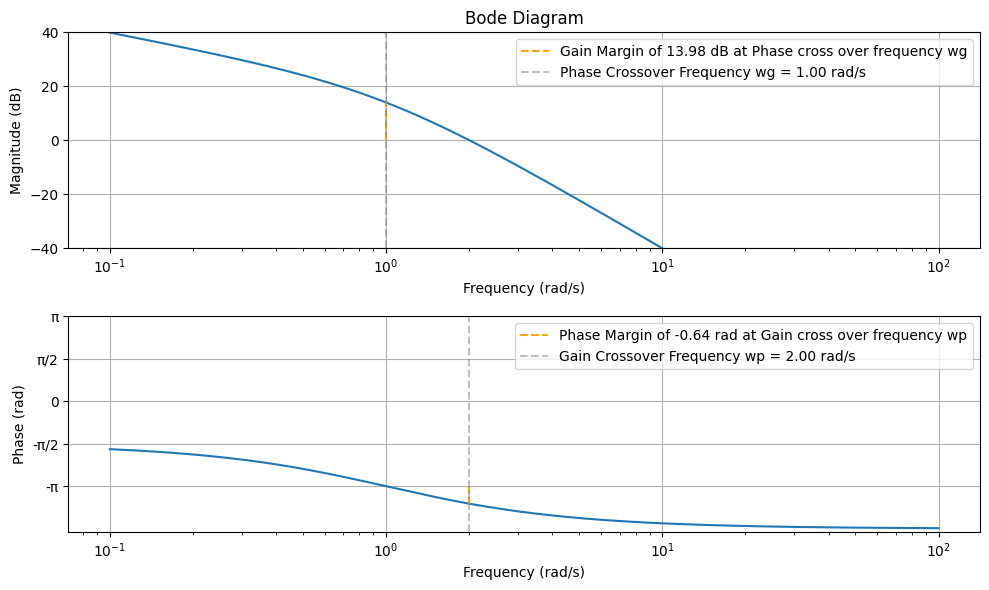

In [72]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_bode_diagram():
    numerator = [10]
    denominator = [1, 2, 1, 0]
    sys = signal.TransferFunction(numerator, denominator)

    # Frequency range for Bode plot
    freq_range = np.logspace(-1, 2, 1000)
    _, magnitude, phase = signal.bode(sys, freq_range)

    # Get the Gain and Phase margins with their pulses
    G = ctrl.TransferFunction(numerator, denominator)
    gm, pm, wg, wp = ctrl.margin(G)

    # Plot Bode diagram
    plt.figure(figsize=(10, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.semilogx(freq_range, magnitude)

    # Draw orange dotted line for Gain Margin
    plt.plot([wg, wg], [0, - ctrl.mag2db(np.abs(gm))],
             color='orange', linestyle='--', label=f'Gain Margin of {- ctrl.mag2db(np.abs(gm)):.2f} dB at Phase cross over frequency wg')
    plt.axvline(wg, color='gray', linestyle='--', label=f'Phase Crossover Frequency wg = {wg:.2f} rad/s', alpha=0.5)

    plt.title('Bode Diagram')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.ylim(-40, 40)
    plt.grid(True)
    plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.semilogx(freq_range, phase * np.pi / 180)
    
    # Draw orange dotted line for Phase Margin
    plt.plot([wp, wp], [-np.pi, -np.pi + pm * np.pi / 180],
             color='orange', linestyle='--', label=f'Phase Margin of {(pm * np.pi / 180):.2f} rad at Gain cross over frequency wp')
    plt.axvline(wp, color='gray', linestyle='--', label=f'Gain Crossover Frequency wp = {wp:.2f} rad/s', alpha=0.5)

    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (rad)')
    plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the Bode diagram
plot_bode_diagram()
